In [1]:
# ImageDataGenerator를 이용해서 Cats and Dogs binary classification
# 문제를 해결해 보아요!

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam  # 평균적으로 높은 효율을 내는 알고리즘
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# ImageDataGenerator 객체 생성
Train_Datagen =  ImageDataGenerator(rescale=1/255)
Test_Datagen =  ImageDataGenerator(rescale=1/255)

In [3]:
train_dir = './cats_and_dogs/train'
test_dir = './cats_and_dogs/test'

In [4]:
# ImageDataGenerator  설정

train_generator = Train_Datagen.flow_from_directory(
    train_dir,   # 학습용 이미지를 가져올 폴더
    classes=['cats', 'dogs'],  # cats 포더의 이미지 label을 0으로
                               #dogs 폴의 이미지는 label을 1로 설정
    target_size=(150, 150),    #이미지 resize
    batch_size=20,             #한번에 20개의 이미지만 가져와서 학습
    class_mode='binary'        #이진분류인 경우 설정
)

test_generator = Test_Datagen.flow_from_directory(
    test_dir,   # 학습용 이미지를 가져올 폴더
    classes=['cats', 'dogs'],  # cats 포더의 이미지 label을 0으로
                               #dogs 폴의 이미지는 label을 1로 설정
    target_size=(150, 150),    #이미지 resize
    batch_size=20,             #한번에 20개의 이미지만 가져와서 학습
    class_mode='binary'        #이진분류인 경우 설정
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
## 전이학습에 대해서 알아보아요!!
## 사용하는 기학습된 네트워크(Pretrained Network)는
## VGG16을 이용해 보아요!

from tensorflow.keras.applications import VGG16

model_base = VGG16(weights='imagenet',
                   include_top=False,    # classification 제외!
                   input_shape=(150,150,3))

print(model_base.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [6]:
# CNN Model 구현
model = Sequential()

model.add(model_base)

model.add(Flatten())    # 전체 데이터를 4차원에서 2차원으로 변경

model.add(Dense(256, activation= 'relu'))

# output layer
model.add(Dense(units=1,
                activation='sigmoid'))

In [7]:
print('before freeze, len of trainable_weights', len(model.trainable_weights))
model_base.trainable = True
print('after  freeze, len of trainable_weights', len(model.trainable_weights))

before freeze, len of trainable_weights 30
after  freeze, len of trainable_weights 30


In [8]:
for layer in model_base.layers[:-10]:
    layer.trainable = False

for layer in model_base.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x00000232645E8F70> False
<keras.layers.convolutional.Conv2D object at 0x000002326FA8E3A0> False
<keras.layers.convolutional.Conv2D object at 0x000002326FA8E9A0> False
<keras.layers.pooling.MaxPooling2D object at 0x00000232030EFD00> False
<keras.layers.convolutional.Conv2D object at 0x00000232030EF310> False
<keras.layers.convolutional.Conv2D object at 0x00000232030F8CA0> False
<keras.layers.pooling.MaxPooling2D object at 0x000002320310D730> False
<keras.layers.convolutional.Conv2D object at 0x000002320310D3D0> False
<keras.layers.convolutional.Conv2D object at 0x00000232032802E0> False
<keras.layers.convolutional.Conv2D object at 0x0000023203280430> True
<keras.layers.pooling.MaxPooling2D object at 0x00000232030F7AC0> True
<keras.layers.convolutional.Conv2D object at 0x0000023203280F70> True
<keras.layers.convolutional.Conv2D object at 0x0000023203295EE0> True
<keras.layers.convolutional.Conv2D object at 0x000002320328F250> True
<keras.la

In [9]:
# print(model.summary())
# model이 어떻게 동작하는지를 지정
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
print(model_base.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 15,666,945
Non-trainable params: 1,145,408
_________________________________________________________________
None


In [12]:
# 설정이 다 되었으면 모델을 학습.
history = model.fit(train_generator,
          steps_per_epoch=100,
          epochs=30,
          verbose=1,
          validation_data=test_generator,
          validation_steps=50)

Epoch 1/30
100/100 [==============================] - 32s 244ms/step - loss: 0.5276 - accuracy: 0.7310 - val_loss: 0.3813 - val_accuracy: 0.8260
Epoch 2/30
100/100 [==============================] - 24s 243ms/step - loss: 0.2661 - accuracy: 0.8890 - val_loss: 0.2538 - val_accuracy: 0.9030
Epoch 3/30
100/100 [==============================] - 24s 244ms/step - loss: 0.1590 - accuracy: 0.9390 - val_loss: 0.3144 - val_accuracy: 0.89204s - - ETA: 4s - loss: 0.1715 - accu - ETA: 3s - loss: 0.1731 - accuracy: 0.93 - ETA: 3s - loss: 0.1735 -  - ETA: 2s - loss: 0
Epoch 4/30
100/100 [==============================] - 24s 244ms/step - loss: 0.0951 - accuracy: 0.9690 - val_loss: 0.2800 - val_accuracy: 0.9020
Epoch 5/30
100/100 [==============================] - 24s 244ms/step - loss: 0.0570 - accuracy: 0.9830 - val_loss: 0.2931 - val_accuracy: 0.8880 0.0574 - accuracy: 0.
Epoch 6/30
100/100 [==============================] - 24s 244ms/step - loss: 0.0450 - accuracy: 0.9815 - val_loss: 0.3399 - val

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 15,666,945
Non-trainable params: 1,145,408
_________________________________________________________________


In [14]:
import matplotlib.pylab as plt

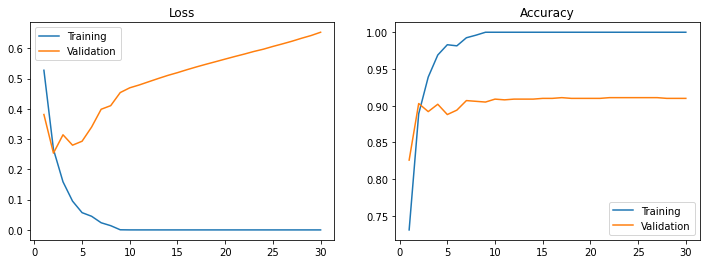

In [15]:
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 30)